<a href="https://colab.research.google.com/github/Hasan-024/ML-Projects/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#calling the cifar10 dataaset from keras
(train_img, train_labels),(test_img, test_labels) = datasets.cifar10.load_data()

In [39]:
#pre-processing the data
train_img = train_img / 255.0
test_img = test_img / 255.0

In [40]:
train_img.shape

(50000, 32, 32, 3)

50000 is the number of images in the dataset. (32,32) is the size of each image. And 3 stands for RGB as we are using colorful images.

In [41]:
train_img[1000,28,28]

array([0.44705882, 0.51372549, 0.54509804])

In [42]:
test_img.shape

(10000, 32, 32, 3)

In [43]:
train_labels.shape

(50000, 1)

In [44]:
test_labels.shape

(10000, 1)

In [45]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [46]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

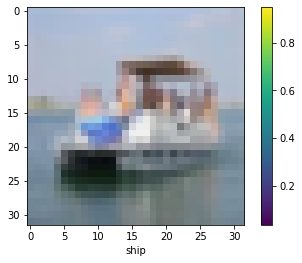

In [47]:
plt.figure()
plt.imshow(train_img[49000])
plt.xlabel(class_names[train_labels[49000][0]])
plt.colorbar()
plt.show()

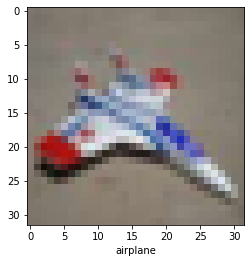

In [48]:
IMG_INDEX = 30  # change this to look at other images

plt.imshow(train_img[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Let's start with building the convolutional neural net!!!


In [49]:
cifar10_model=tf.keras.models.Sequential()
# First Layer(Conv_layer_1)
cifar10_model.add(layers.Conv2D(input_shape=[32,32,3],filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

In [50]:
# Conv_layer_2)
cifar10_model.add(layers.Conv2D(input_shape=[32,32,3],filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

In [51]:
#Pooling_layer_1
cifar10_model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

In [52]:
# Conv_layer_3)
cifar10_model.add(layers.Conv2D(input_shape=[32,32,3],filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

In [53]:
# Conv_layer_4)
cifar10_model.add(layers.Conv2D(input_shape=[32,32,3],filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

In [54]:
#Pooling_layer_2
cifar10_model.add(layers.MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

In [55]:
#Flattening the last layer to connect to the dense layers
cifar10_model.add(layers.Flatten())

In [56]:
# Droput Layer
cifar10_model.add(layers.Dropout(0.5,noise_shape=None,seed=None))

In [57]:
#Creating first fully connected (dense) layer
cifar10_model.add(layers.Dense(units= 128,activation ="relu"))

In [58]:
#creating output layer (2nd dense layer)
cifar10_model.add(layers.Dense(units= 10,activation="softmax"))

Let's look at the summary of the model and the layers that are built

In [59]:
cifar10_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [60]:
#Compiling the model

cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["Accuracy"])

In [61]:
cifar10_model.fit(train_img,train_labels,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 244s 155ms/step - loss: 1.4225 - Accuracy: 0.4845
Epoch 2/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.0073 - Accuracy: 0.6407
Epoch 3/10
1563/1563 [==============================] - 241s 154ms/step - loss: 0.8540 - Accuracy: 0.6972
Epoch 4/10
1563/1563 [==============================] - 240s 154ms/step - loss: 0.7544 - Accuracy: 0.7332
Epoch 5/10
1563/1563 [==============================] - 240s 153ms/step - loss: 0.6889 - Accuracy: 0.7561
Epoch 6/10
1563/1563 [==============================] - 239s 153ms/step - loss: 0.6359 - Accuracy: 0.7737
Epoch 7/10
1563/1563 [==============================] - 238s 152ms/step - loss: 0.5917 - Accuracy: 0.7916
Epoch 8/10
1563/1563 [==============================] - 238s 153ms/step - loss: 0.5510 - Accuracy: 0.8054
Epoch 9/10
1563/1563 [==============================] - 238s 152ms/step - loss: 0.5176 - Accuracy: 0.8157
Epoch 10/10
1563/1563 [=======================

In [62]:
test_loss, test_accuracy = cifar10_model.evaluate(test_img, test_labels, verbose = 2)
print(" Test accuracy is:", test_accuracy)

313/313 - 11s - loss: 0.6750 - Accuracy: 0.7736
 Test accuracy is: 0.7735999822616577


In [63]:
predictions = cifar10_model.predict(test_img)

In [73]:
prediction_1 = predictions[9000]

In [74]:
prediction_1 = np.argmax(prediction_1)
prediction_1

8

In [75]:
test_labels[9000]

array([8], dtype=uint8)

In [76]:
prediction_1 = predictions[5000]
prediction_1 = np.argmax(prediction_1)
prediction_1

7

In [77]:
test_labels[5000]

array([7], dtype=uint8)